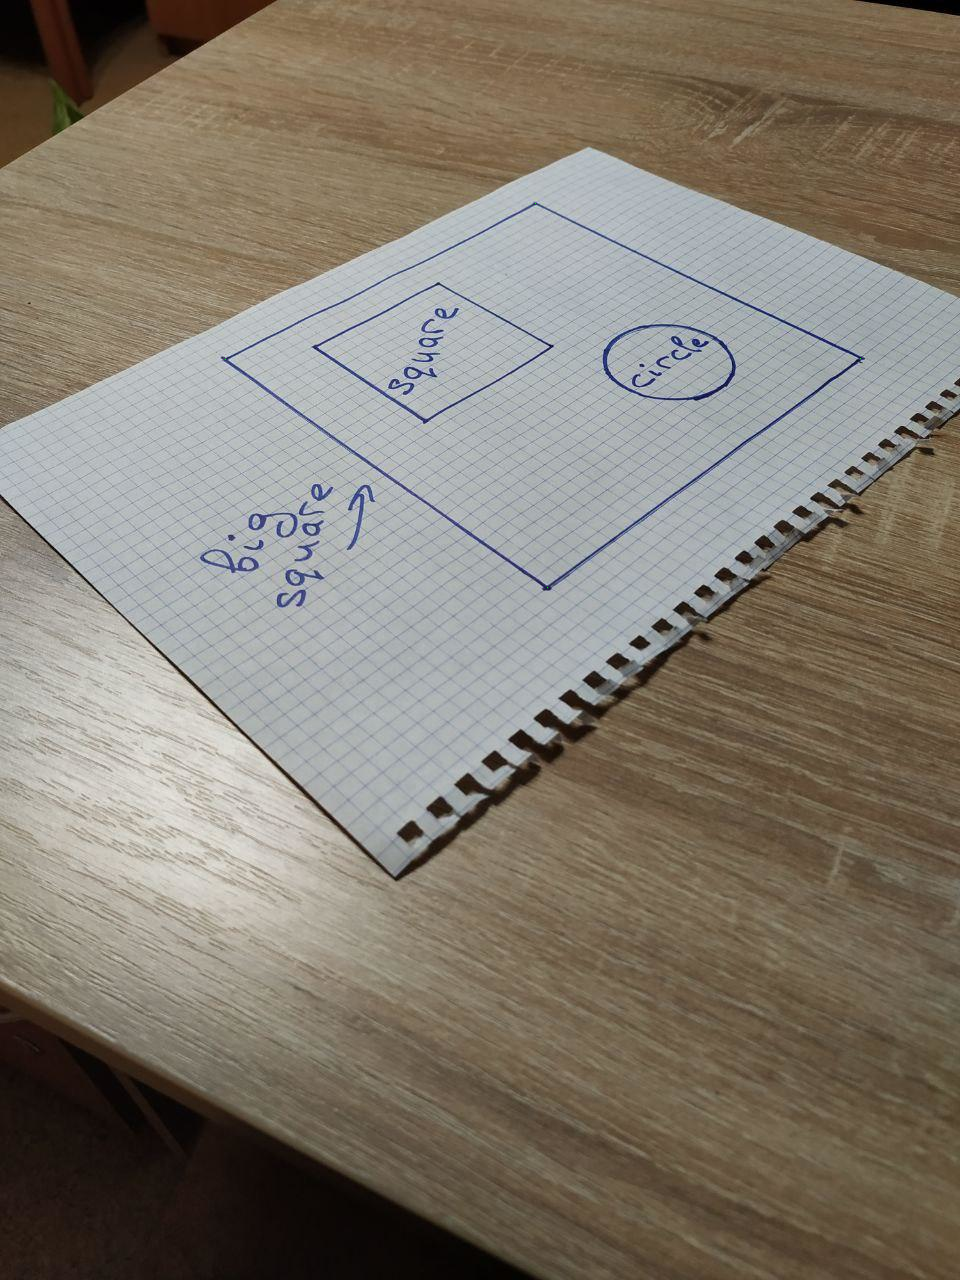

In [47]:
from PIL import Image
import numpy as np
import math

im = Image.open("src_image.png")
arr = np.array(Image.open("src_image.png"))

height = len(arr)
width = len(arr[0])

display(im)

In [48]:
src_corners_x = []
src_corners_y = []

rectified_height = 1000
rectified_width = 1000
padding = 300

rectified_arr = np.array([[arr[0][0]] * rectified_width for i in range(rectified_height)])

dst_corners_x = [padding, rectified_height - padding, padding, rectified_height - padding]
dst_corners_y = [rectified_width - padding, rectified_width -padding, padding, padding]

for i in range(height):
	for j in range(width):
		if arr[i][j][0] == 0 and arr[i][j][1] == 255 and arr[i][j][2] == 0:
			src_corners_x.append(i)
			src_corners_y.append(j);


assert len(src_corners_x) == 4

In [49]:
A = []

for i in range(4):
    x = dst_corners_x[i]
    y = dst_corners_y[i]
    
    x1 = src_corners_x[i]
    y1 = src_corners_y[i]
    

    A.append([x, y, 1, 0, 0, 0, -x1 * x, -x1 * y, -x1])
    A.append([0, 0, 0, x, y, 1, -y1 * x, -y1 * y, -y1])

A.append([0, 0, 0, 0, 0, 0, 0, 0, 1])

A = np.array(A)
B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1])

h = np.linalg.solve(A, B)

h = h.reshape((3, 3))

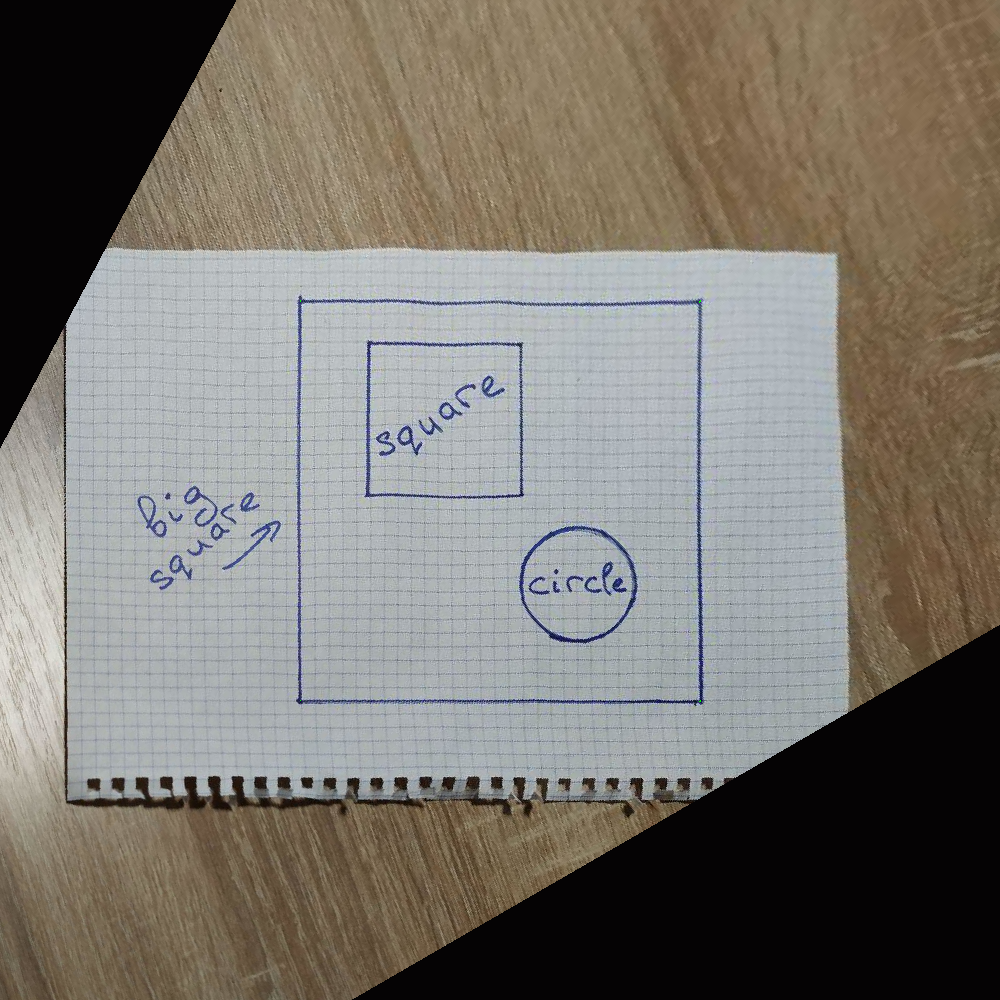

In [50]:
for x in range(0, rectified_height):
    for y in range(0, rectified_width):
        pt = np.array([x, y, 1])
        rect_pt = h @ pt.T

        rect_pt[0] /= rect_pt[2]
        rect_pt[1] /= rect_pt[2]
        
        x1 = int(rect_pt[0])
        y1 = int(rect_pt[1])
        
        if x1 >= 0 and x1 < len(arr) and y1 >= 0 and y1 < len(arr[0]):
            rectified_arr[x][y] = arr[x1][y1]

rectified_image = Image.fromarray(rectified_arr)
rectified_image.save("rectified_image.png")
display(rectified_image)